# 가설검정 연습문제

## 문제 1

당신은 매일 아침 동네 빵집에서 식빵을 구입해 왔다.

이 식빵의 무게는 500g이라고 표시되어 있다. 하지만 당신은 자신이 구매하는 빵이 500g이 맞는지 의구심이 들기 시작한다. 그래서 1개월간 식빵을 사운 뒤 매일 무게를 기록하였고 그 결과는 아래의 데이터와 같다.



In [99]:
from pandas import read_excel
from scipy.stats import t
from matplotlib import pyplot as plt
import seaborn as sb
import sys

In [100]:
df = read_excel("https://data.hossam.kr/E02/bread.xlsx")
df

,무게
0,495
1,496
2,502
3,494
4,499
5,501
6,493
7,494
8,495
9,501


1개월간 측정한 빵의 평균 무게는 495.3g이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?

In [101]:
sample_mean = df['무게'].mean()
sample_mean

495.3666666666667

In [102]:
sample_size = len(df['무게'])
sample_size

30

In [103]:
clevel = 0.95
dof = sample_size -1

In [104]:
sample_std = df['무게'].std(ddof=1)
sample_std

3.557249357088388

In [105]:
sample_std_error = sample_std / (sample_size**0.5)
sample_std_error

0.6494619051826865

#### 신뢰구간

In [109]:
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)
cmin , cmax

(494.03836792675105, 496.6949654065823)

In [107]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

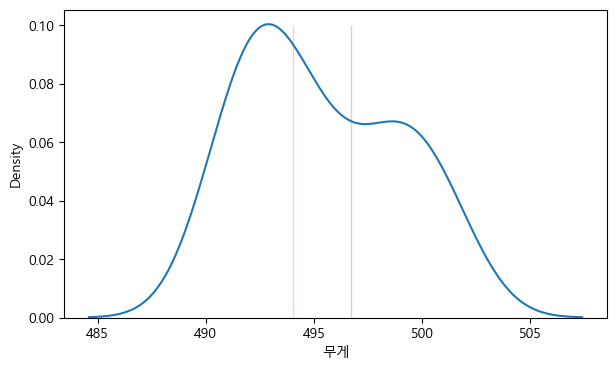

In [124]:
sb.kdeplot(data=df, x='무게')
sb.lineplot(x=[cmin, cmin], y=[0, 0.1], color='red')
sb.lineplot(x=[cmax, cmax], y=[0, 0.1], color='blue')
plt.show()
plt.close()

빵의 평균 무게  : $\mu$

$H_0 : \mu = 500$

$H_1: \mu < 500$

In [122]:
t, p = stats.ttest_1samp(df['무게'],500, alternative = 'less')
"t-statistic: {:}, p-value {:}".format(t,p) # 3 자리수까지 표기

't-statistic: -7.134111017689359, p-value 3.753329744544767e-08'

`p -value = 3.753329744544767e-08''`는 우리가 생각한 유의구간 0.01보다 작으므로 귀무가설의 채택을 거절한다. 

따라서 구입한 빵의 평균 무게가 500g보다 작을 확률이 99%이기 때문에 우리는 컴플레인을 걸 수 있다.